In [5]:
!pip install seaborn pandas matplotlib numpy scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from datetime import datetime
from scipy import stats
wr.filterwarnings('ignore')

Loading the customers data


In [8]:
customers = pd.read_csv("Customers.csv")
print("Customers Data Head:")
print(customers.head())


Customers Data Head:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


Checking customers shape

In [11]:
customers.shape

(200, 4)

Checking customers information

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


Loading products data

In [13]:
Products = pd.read_csv("Products.csv")
print("Products Data Head:")
print(Products.head())

Products Data Head:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


Loading transactions dataset

In [14]:
Transactions = pd.read_csv("Transactions.csv")
print("Transactions Data Head:")
print(Transactions.head())

Transactions Data Head:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


Checking shapes for both dataset


In [15]:
print("Products Shape:", Products.shape)
print("Transactions Shape:", Transactions.shape)

Products Shape: (100, 4)
Transactions Shape: (1000, 7)


Checking Information

In [16]:
print("\nProducts Info:")
Products.info()
print("\nTransactions Info:")
Transactions.info()


Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4

Checking for null values

In [17]:
print("\nNull Values in Customers:")
print(pd.isnull(customers).sum())
print("\nNull Values in Products:")
print(pd.isnull(Products).sum())
print("\nNull Values in Transactions:")
print(pd.isnull(Transactions).sum())


Null Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Null Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Null Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Checking for duplicates

In [19]:
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", Products.duplicated().sum())
print("Transactions:", Transactions.duplicated().sum())


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


Converting date columns

In [20]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])

Merging the datasets

In [21]:
mergeddata = Transactions.merge(customers, on='CustomerID').merge(Products, on='ProductID')

Basic product analysis

In [22]:
productrevenue = mergeddata.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop Products by Revenue:")
print(productrevenue.head())


Top Products by Revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


Regional Analysis

In [23]:
regioncustomers = customers['Region'].value_counts()
print("\nCustomers by Region:")
print(regioncustomers)


Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


Monthly revenue analysis

In [24]:
mergeddata['MonthYear'] = mergeddata['TransactionDate'].dt.to_period('M')
monthlyrevenue = mergeddata.groupby('MonthYear')['TotalValue'].sum()
print("\nMonthly Revenue Trends:")
print(monthlyrevenue)


Monthly Revenue Trends:
MonthYear
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


Customer engagement analysis

In [25]:
mergeddata['DaysSinceSignup'] = (mergeddata['TransactionDate'] - mergeddata['SignupDate']).dt.days
signupcorrelation = mergeddata.groupby('CustomerID')['DaysSinceSignup'].mean()
print("\nAverage Days Since Signup per Customer:")
print(signupcorrelation.head())


Average Days Since Signup per Customer:
CustomerID
C0001    701.800
C0002    874.500
C0003     85.250
C0004    663.875
C0005    673.000
Name: DaysSinceSignup, dtype: float64


Category analysis

In [26]:
categoryrevenue = mergeddata.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop Categories by Revenue:")
print(categoryrevenue)


Top Categories by Revenue:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


Enhanced Customer Analysis

In [27]:
customer_stats = pd.DataFrame({
    'purchase_count': mergeddata.groupby('CustomerID')['TransactionID'].count(),
    'total_spend': mergeddata.groupby('CustomerID')['TotalValue'].sum(),
    'avg_basket_size': mergeddata.groupby('CustomerID')['Quantity'].mean()
})
print("\nCustomer Statistics:")
print(customer_stats.describe())


Customer Statistics:
       purchase_count   total_spend  avg_basket_size
count      199.000000    199.000000       199.000000
mean         5.025126   3467.314372         2.530796
std          2.198340   1832.677958         0.561653
min          1.000000     82.360000         1.000000
25%          3.000000   2162.040000         2.200000
50%          5.000000   3137.660000         2.500000
75%          6.000000   4770.225000         3.000000
max         11.000000  10673.870000         4.000000


Time based analysis

In [28]:
mergeddata['DayOfWeek'] = mergeddata['TransactionDate'].dt.dayofweek
dow_revenue = mergeddata.groupby('DayOfWeek')['TotalValue'].mean()
print("\nAverage Revenue by Day of Week:")
print(dow_revenue)


Average Revenue by Day of Week:
DayOfWeek
0    733.700216
1    666.058957
2    754.450316
3    661.351400
4    696.256720
5    646.029683
6    666.229712
Name: TotalValue, dtype: float64


Visualization

1.PRODUCT REVENUE

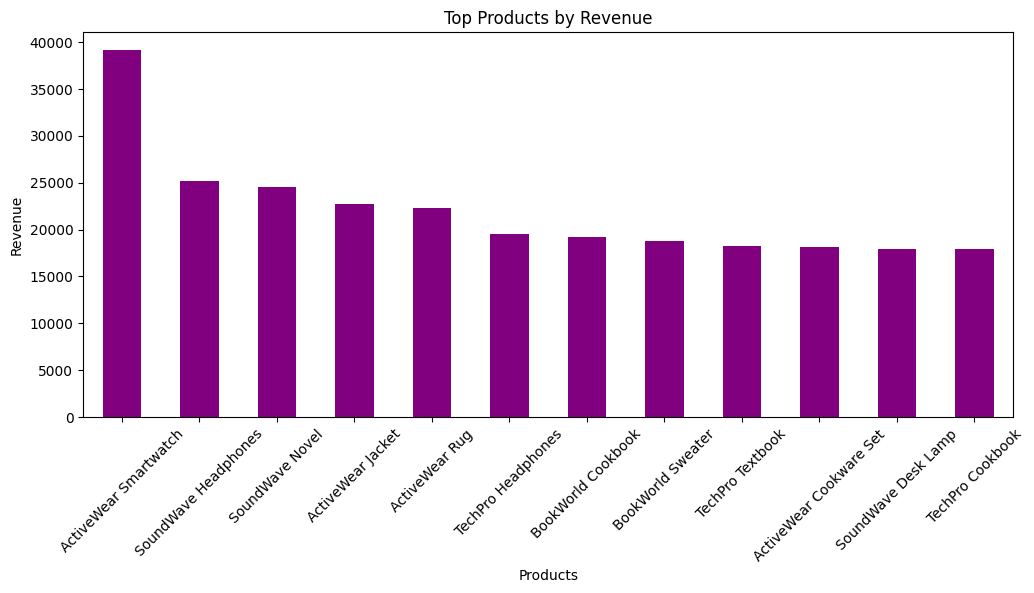

In [29]:
plt.figure(figsize=(12, 5))
plt.title("Top Products by Revenue")
productrevenue.head(12).plot(kind='bar', color='purple')
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

2.REGIONAL DISTRIBUTION

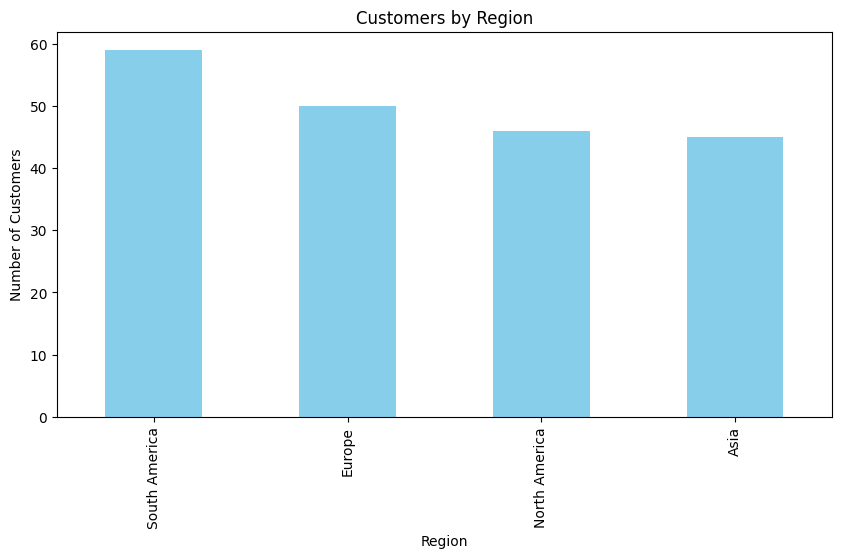

In [30]:
plt.figure(figsize=(10, 5))
plt.title("Customers by Region")
regioncustomers.plot(kind='bar', color='skyblue')
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


3. MONTHLY REVENUE

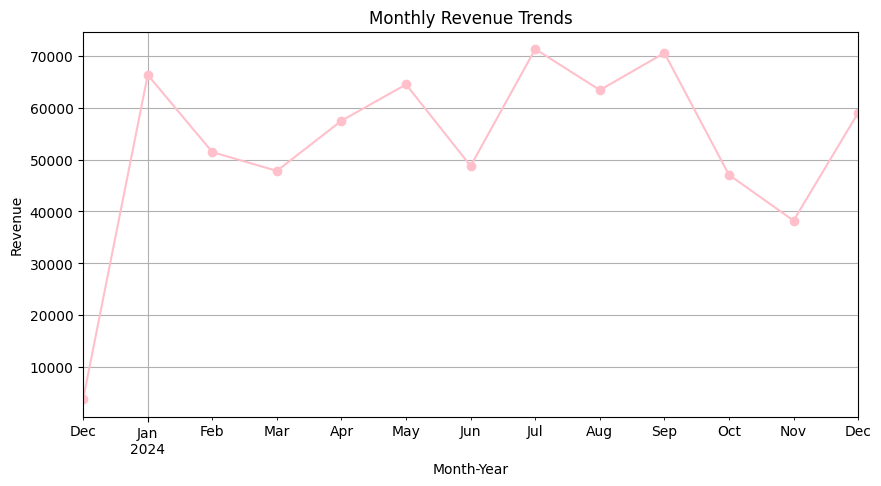

In [31]:
plt.figure(figsize=(10, 5))
plt.title("Monthly Revenue Trends")
monthlyrevenue.plot(marker='o', color='pink')
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

4. CUSTOMER SEGMENTS

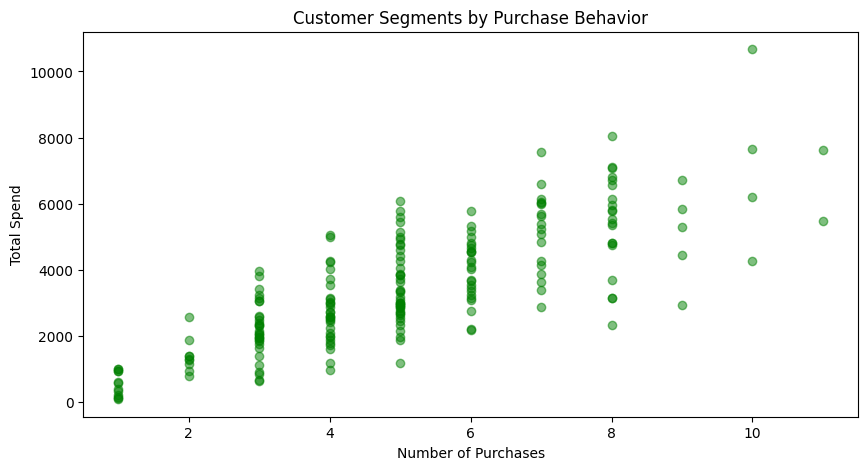

In [32]:
plt.figure(figsize=(10, 5))
plt.title("Customer Segments by Purchase Behavior")
plt.scatter(customer_stats['purchase_count'], 
           customer_stats['total_spend'], 
           alpha=0.5, 
           color='green')
plt.xlabel("Number of Purchases")
plt.ylabel("Total Spend")
plt.show()

5. CATEGORY PERFORMANCE

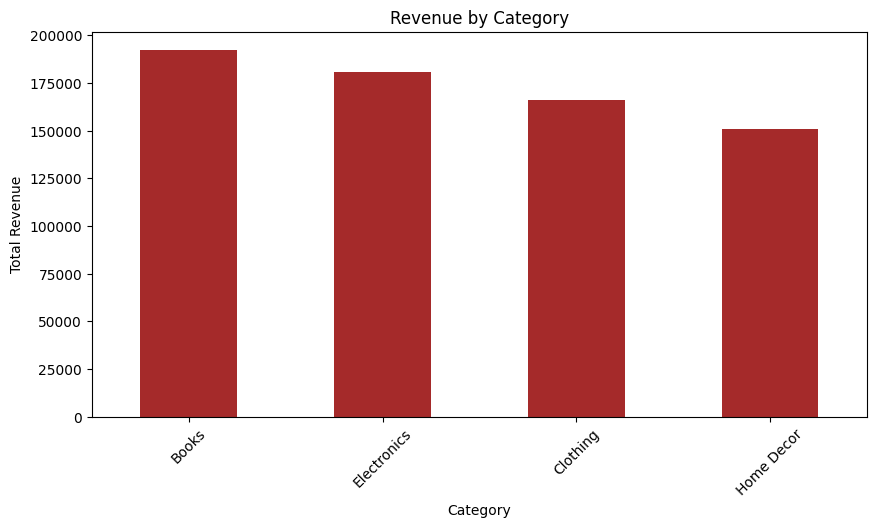

In [35]:
plt.figure(figsize=(10, 5))
plt.title("Revenue by Category")
categoryrevenue.plot(kind='bar', color='brown')
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

6. DAILY PATTERNS

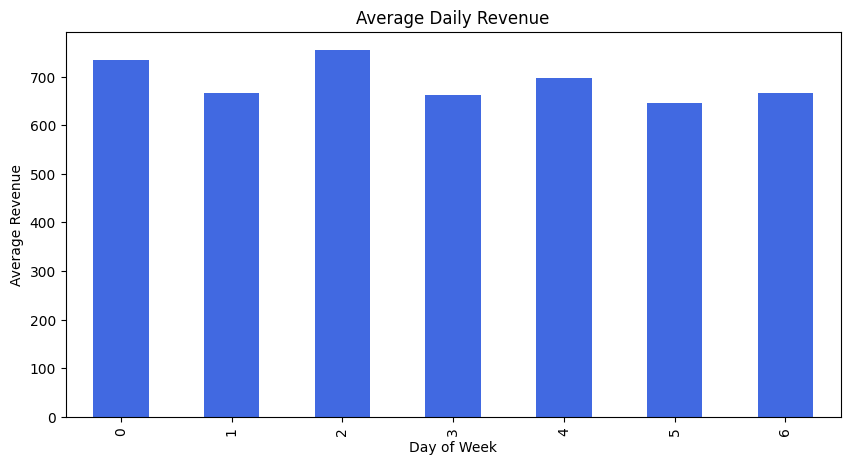

In [41]:
plt.figure(figsize=(10, 5))
plt.title("Average Daily Revenue")
dow_revenue.plot(kind='bar', color='royalblue')
plt.xlabel("Day of Week")
plt.ylabel("Average Revenue")
plt.show()


Statistical Analysis

In [42]:
print("\nCorrelation Analysis:")
correlation_matrix = customer_stats.corr()
print(correlation_matrix)


Correlation Analysis:
                 purchase_count  total_spend  avg_basket_size
purchase_count         1.000000     0.794720         0.025378
total_spend            0.794720     1.000000         0.359232
avg_basket_size        0.025378     0.359232         1.000000
